In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import zscore
from  sklearn.datasets import  load_wine
import seaborn as sb
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
import xgboost 
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

In [49]:
wine_data = load_wine()

In [50]:
dir(wine_data)

['DESCR', 'data', 'feature_names', 'frame', 'target', 'target_names']

In [51]:
print(wine_data.DESCR)

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            1

In [52]:
inputs = wine_data.data

In [53]:
output = wine_data.target

In [54]:
inputs.shape

(178, 13)

In [55]:
wine_data.feature_names

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

In [56]:
ds = pd.DataFrame(inputs, columns = wine_data.feature_names)

In [57]:
ds = pd.concat([ds, pd.DataFrame(output)], axis = 1 )

In [58]:
ds.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,0
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [59]:
ds.isnull().sum()

alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
0                               0
dtype: int64

In [60]:
ds.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,0
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,0.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,0.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,0.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,1.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,2.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,2.000000


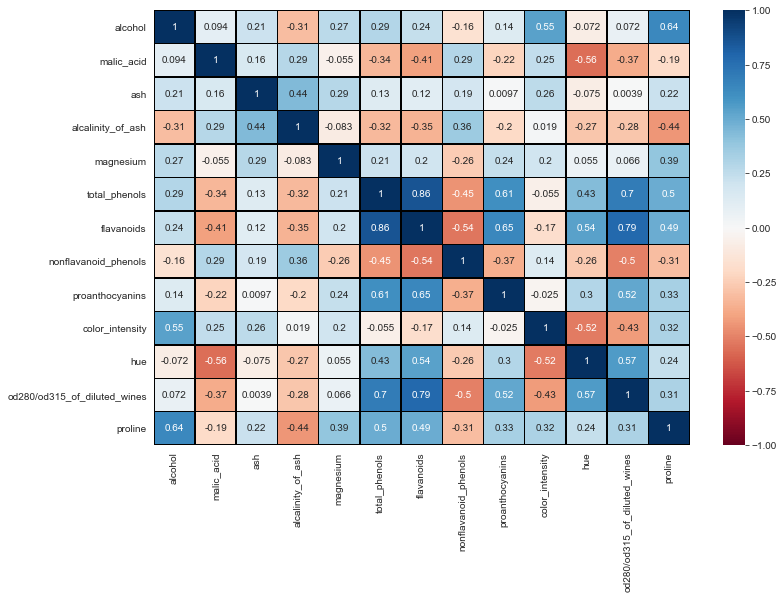

In [61]:
sb.set_style('whitegrid')
plt.figure(figsize = (12,8))
sb.heatmap(ds.drop([0], 1).corr(), cmap = 'RdBu', vmin = -1, vmax = 1, center = 0, 
           linewidth = .5, linecolor = 'black', annot = True)

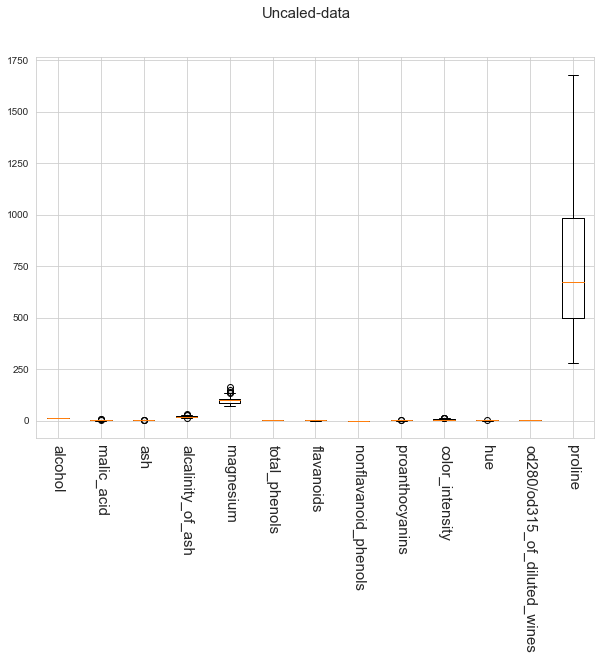

In [62]:
fig = plt.figure()
fig.suptitle('Uncaled-data', fontsize = 15)
ax = fig.add_subplot(111)
plt.boxplot(ds.drop([0], 1).values)
ax.set_xticklabels(wine_data.feature_names,
                  fontsize = 15, rotation = -90)
fig.set_size_inches(10,7)
plt.show() 

In [63]:
z = abs(zscore(ds.drop([0], 1)))

In [64]:
ds_new = ds[(z<3).all(axis =1)]

In [65]:
print('no. of outliers removed:',ds[0].shape[0] - ds_new.shape[0])

no. of outliers removed: 10


In [66]:
# outlier-free data set
x = ds_new.loc[:,wine_data.feature_names]
y = ds_new.loc[:,[0]]

In [67]:
y.shape, x.shape

((168, 1), (168, 13))

In [68]:
x_train, x_test, y_train, y_test = train_test_split(x, y,
                                                        random_state = 42  ,test_size = 0.3)

In [69]:
x_train.shape , y_train.shape, x_test.shape, y_test.shape

((117, 13), (117, 1), (51, 13), (51, 1))

In [70]:
k =  KFold(n_splits = 10, shuffle = True, random_state = 42)

In [71]:
scaler = StandardScaler()
scaler.fit(x_train)

StandardScaler()

In [72]:
# scaling training data
x_train = scaler.transform(x_train)
x_train = pd.DataFrame(x_train, columns = wine_data.feature_names)

In [73]:
x_train

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,0.469900,2.039458,1.970648,1.859601,0.949596,-0.420803,-1.040198,-0.756953,-0.842508,1.544448,-1.240946,-0.881296,-0.397229
1,-0.509014,-0.887582,-1.918707,-0.215262,-0.891886,-1.271046,-0.630009,-0.601031,-0.408742,-1.245134,0.439081,0.288238,-0.623728
2,1.350922,-0.761881,-0.217114,-0.757918,-0.354787,-0.067871,0.467248,-0.834913,-0.011122,-0.069360,1.029361,0.357034,1.767843
3,-0.888343,-0.645158,-0.662769,0.391236,0.259040,-1.832527,-0.978670,0.022655,-0.209932,-0.968482,-0.169361,-1.018888,0.402182
4,0.420954,0.207814,-0.095572,0.263553,-0.815158,-1.351257,-1.511916,0.022655,-1.691968,0.207293,-1.104727,-0.124539,0.102403
...,...,...,...,...,...,...,...,...,...,...,...,...,...
112,-1.659238,-0.402735,-1.837678,-1.013286,-0.201330,-1.014369,-0.414659,-0.211227,-0.770214,-0.622666,1.301798,-0.578593,-1.070066
113,-1.536874,0.315557,2.213732,0.263553,0.259040,-0.789776,0.057058,1.815753,-0.950950,-0.622666,1.301798,-0.083261,-0.473839
114,1.669069,-0.411713,0.025971,-2.290125,0.182312,1.696784,1.708071,-0.601031,2.501109,1.083360,1.165579,0.604700,2.657188
115,-0.888343,-0.824731,-1.594594,-1.013286,-1.122071,0.493610,0.539031,-0.601031,0.350350,-1.037645,1.301798,0.246960,-1.070066


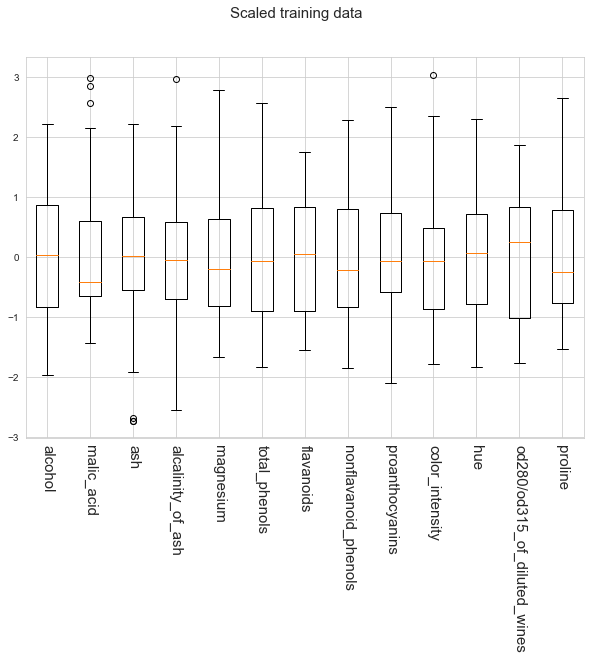

In [74]:
fig = plt.figure()
fig.suptitle('Scaled training data', fontsize = 15)
ax = fig.add_subplot(111)
plt.boxplot(x_train.values)
ax.set_xticklabels(wine_data.feature_names,
                  fontsize = 15, rotation = -90)
fig.set_size_inches(10,7)
plt.show() 

In [75]:
# scaling testing data with the mean and std of training data.
x_test = scaler.transform(x_test)
x_test = pd.DataFrame(x_test,  columns = wine_data.feature_names)

### Base model evaluation

model: RandomForestClassifier(random_state=42)
CV score:0.9742424242424242
score_std: 0.03939393939393941
----------
model: LogisticRegression()
CV score:0.9643939393939392
score_std: 0.043657665255223986
----------
model: SVC()
CV score:0.9825757575757577
score_std: 0.034889633150513515
----------
model: AdaBoostClassifier()
CV score:0.8916666666666666
score_std: 0.11211353372561426
----------
model: GradientBoostingClassifier(random_state=42)
CV score:0.915151515151515
score_std: 0.07459717348540104
----------
model: KNeighborsClassifier()
CV score:0.9734848484848484
score_std: 0.04054976876082619
----------
model: XGBClassifier()
CV score:0.974242424242424
score_std: 0.03939393939393941
----------
model: GaussianNB()
CV score:0.9742424242424242
score_std: 0.03939393939393941
----------


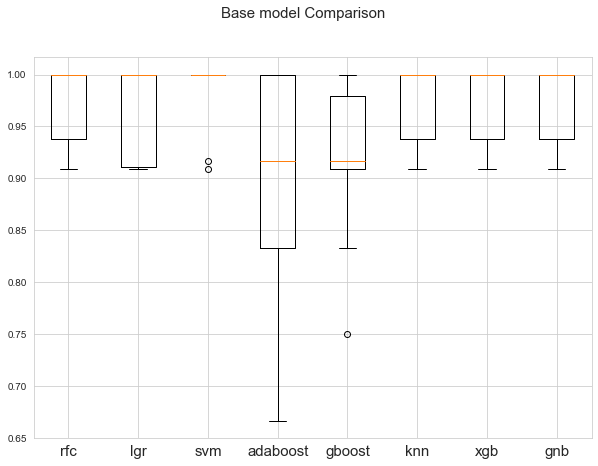

In [76]:
rfc = RandomForestClassifier(random_state = 42)
lgr = LogisticRegression()
svm = SVC()
adaboost =  AdaBoostClassifier()
gboost = GradientBoostingClassifier(random_state = 42)
knn = KNeighborsClassifier()
xgb = xgboost.XGBClassifier()
gnb = GaussianNB()
models = [rfc, lgr, svm, adaboost, gboost, knn, xgb, gnb]

scores = []
for model in models:
    
    score = cross_val_score(model, x_train, y_train, cv = k, scoring = 'accuracy', n_jobs = -1 )
    mean_score = score.mean()
    std_score = score.std()
    
    print('model: {}'.format(model))
    print('CV score:{}'.format(mean_score))
    print('score_std:',std_score)
    print('----------')
    scores.append(score)
    
fig = plt.figure()
fig.suptitle('Base model Comparison', fontsize = 15)
ax = fig.add_subplot(111)
plt.boxplot(scores)
ax.set_xticklabels(['rfc', 'lgr','svm', 'adaboost', 'gboost', 'knn', 'xgb', 'gnb'],
                  fontsize = 15)
fig.set_size_inches(10,7)
plt.show() 

<Figure size 864x864 with 0 Axes>

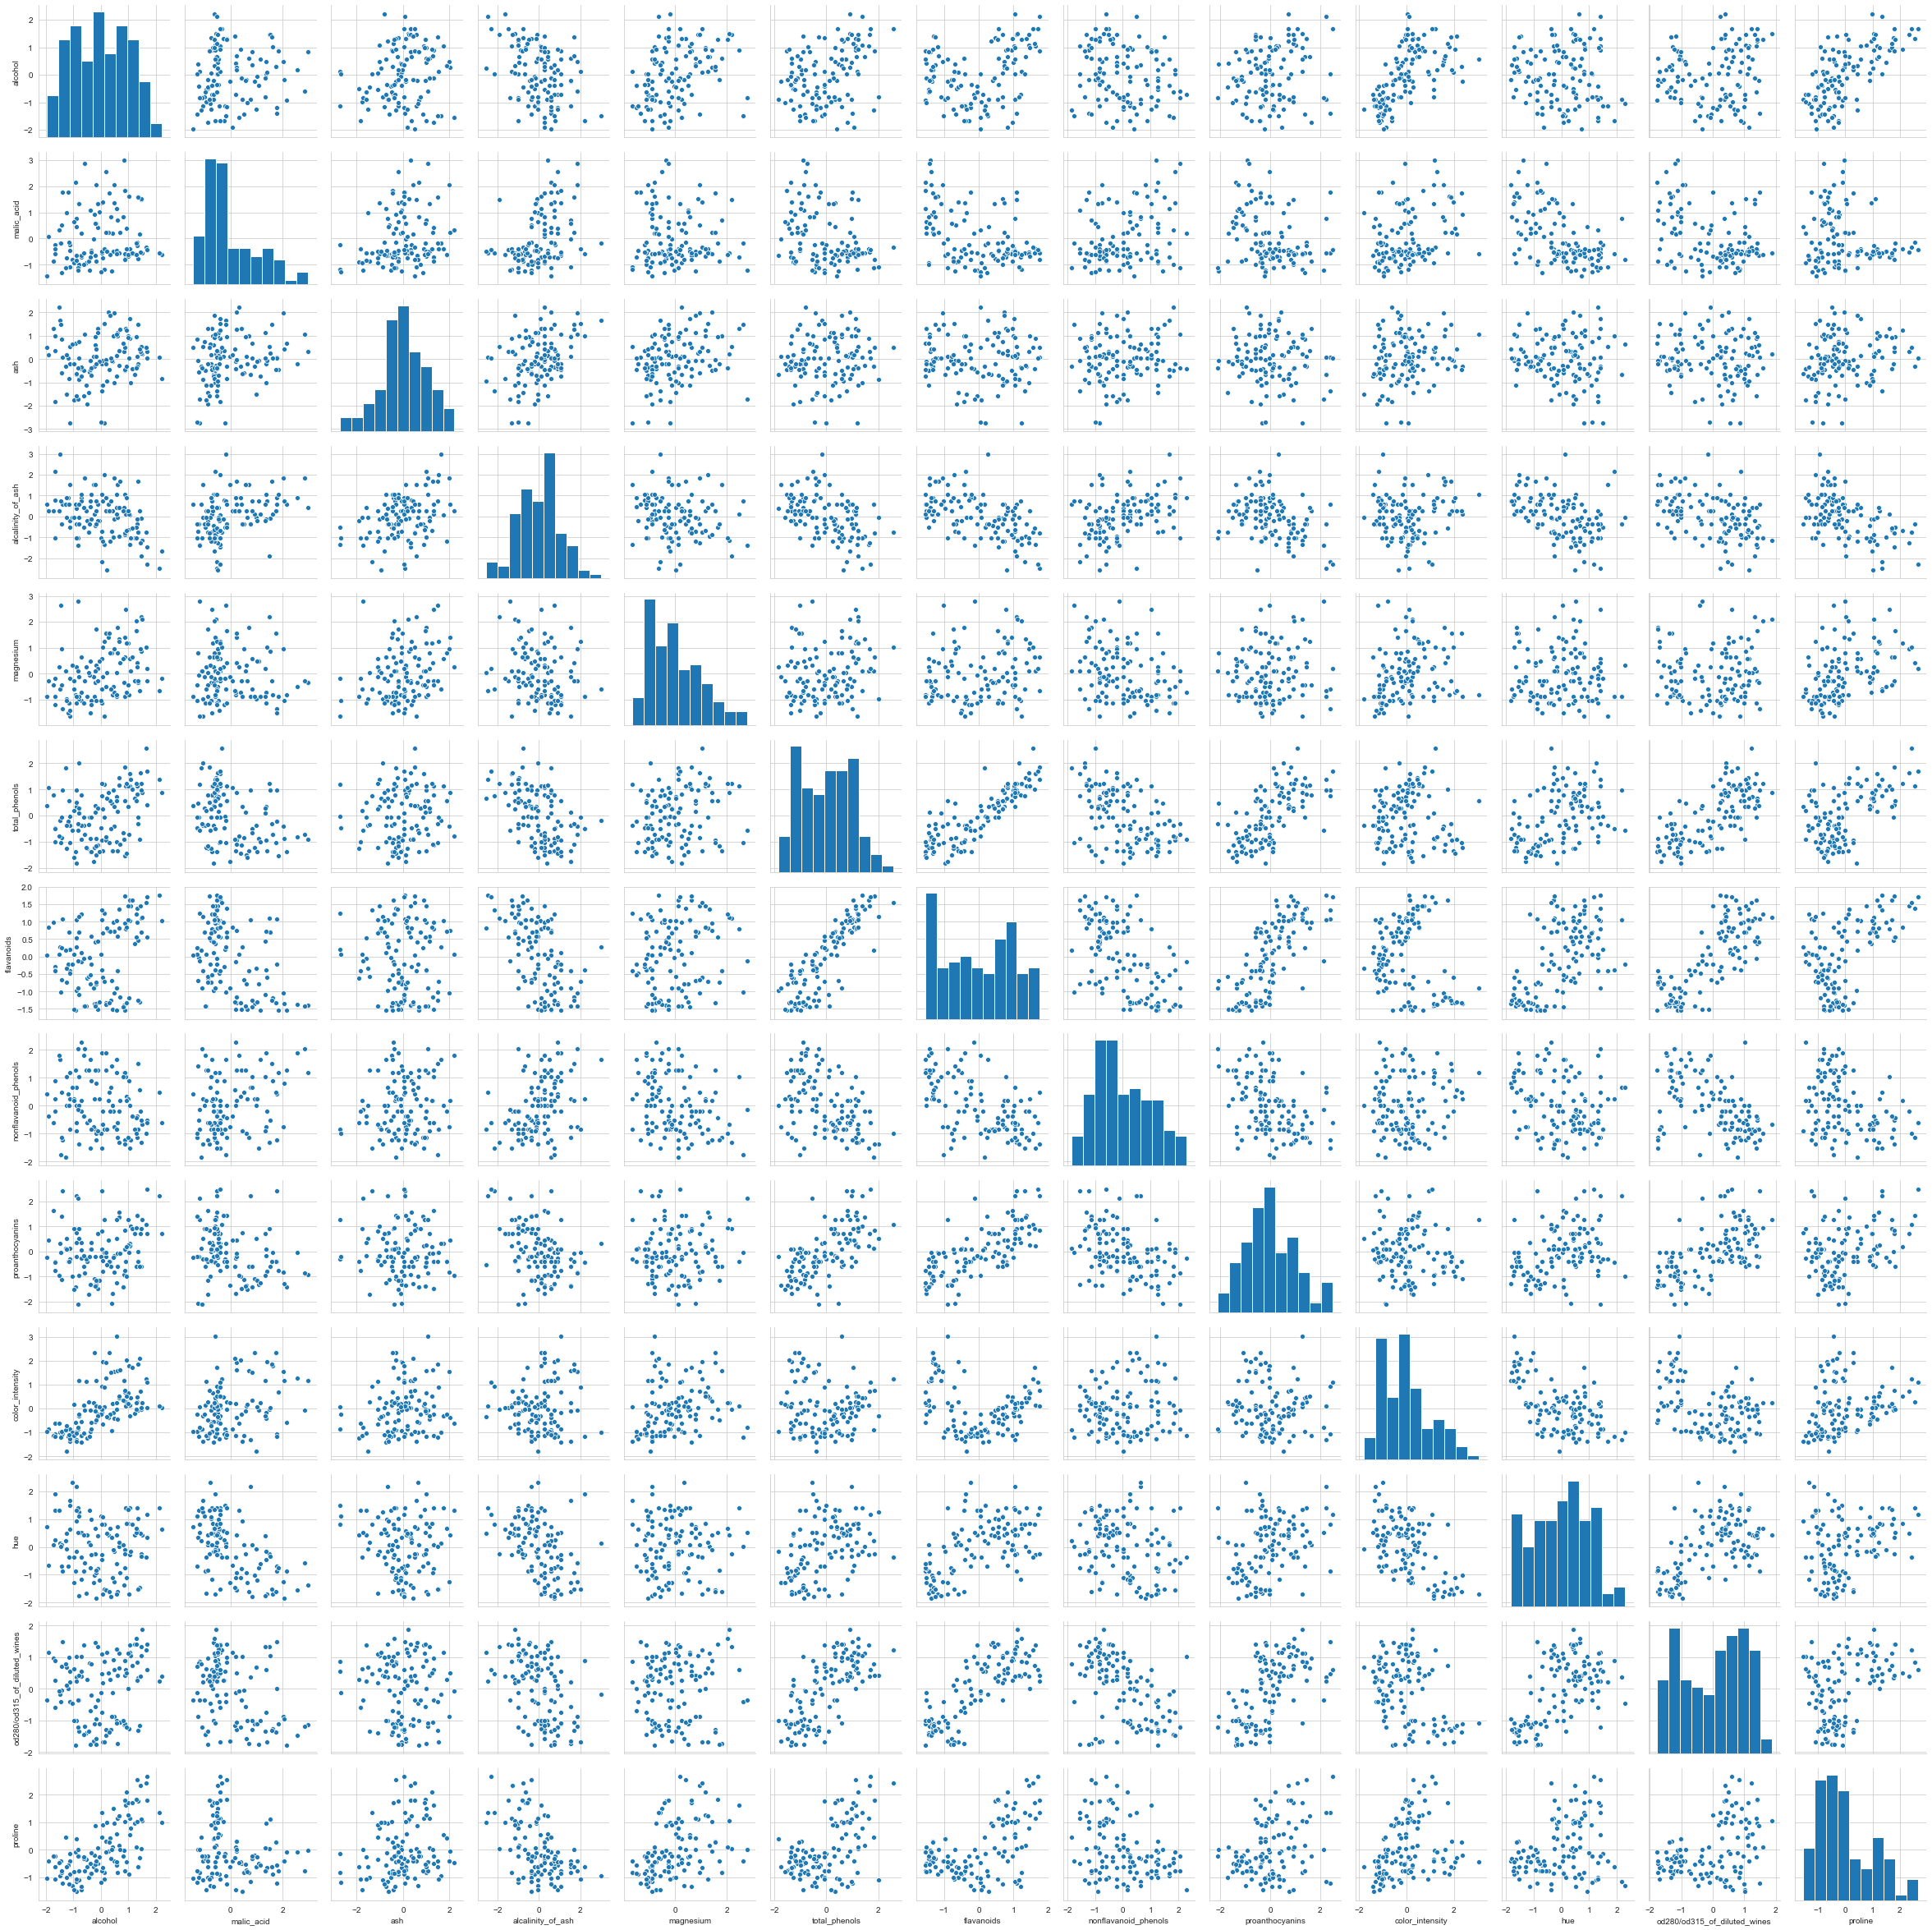

In [77]:
plt.figure(figsize = (12,12))
sb.pairplot(x_train)

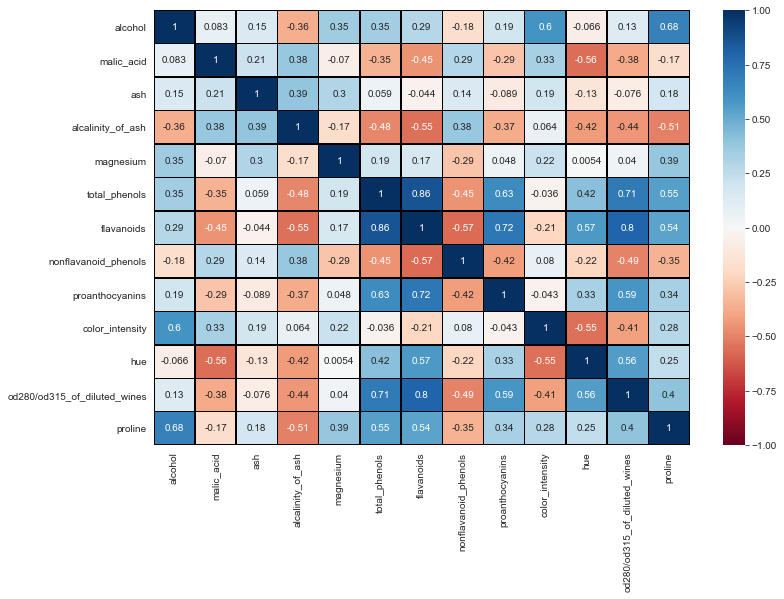

In [78]:
sb.set_style('whitegrid')
plt.figure(figsize = (12,8))
sb.heatmap(x_train.corr(), cmap = 'RdBu', vmin = -1, vmax = 1, center = 0, 
           linewidth = .5, linecolor = 'black', annot = True)

From above pairplot and heatmap we can see high multi-collinearity due to feature 'flavanoids', so we shall remove it.

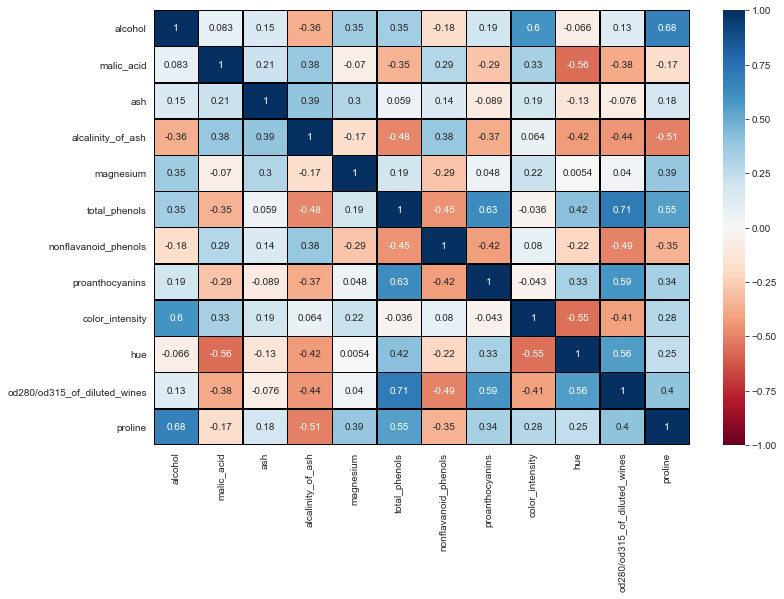

In [79]:
sb.set_style('whitegrid')
plt.figure(figsize = (12,8))
sb.heatmap(x_train.drop(['flavanoids'], axis = 1).corr(), cmap = 'RdBu', 
           vmin = -1, vmax = 1, center = 0, 
           linewidth = .5, linecolor = 'black', annot = True)

In [80]:
x_train_red = x_train.drop(['flavanoids'], axis = 1)

In [81]:
x_train_red.shape

(117, 12)

In [82]:
x_test_red = x_test.drop(['flavanoids'], axis = 1)

In [83]:
x_test_red.shape

(51, 12)

model: RandomForestClassifier()
CV score:0.974242424242424
score_std: 0.03939393939393941
----------
model: LogisticRegression()
CV score:0.9643939393939392
score_std: 0.043657665255223986
----------
model: SVC()
CV score:0.9734848484848484
score_std: 0.04054976876082619
----------
model: AdaBoostClassifier()
CV score:0.8810606060606061
score_std: 0.07718726706206509
----------
model: GradientBoostingClassifier()
CV score:0.9318181818181817
score_std: 0.05059335714261818
----------
model: KNeighborsClassifier()
CV score:0.9568181818181818
score_std: 0.05710030965518567
----------
model: XGBClassifier()
CV score:0.9659090909090908
score_std: 0.041804180791883035
----------
model: GaussianNB()
CV score:0.9833333333333332
score_std: 0.03333333333333335
----------


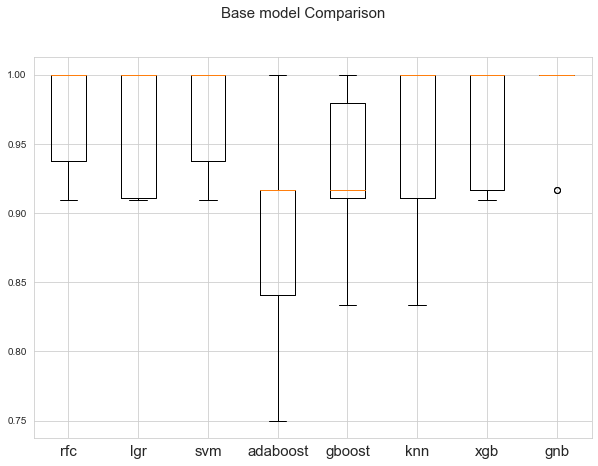

In [84]:
rfc = RandomForestClassifier()
lgr = LogisticRegression()
svm = SVC()
adaboost =  AdaBoostClassifier()
gboost = GradientBoostingClassifier()
knn = KNeighborsClassifier()
xgb = xgboost.XGBClassifier()
gnb = GaussianNB()
models = [rfc, lgr, svm, adaboost, gboost, knn, xgb, gnb]

scores = []
for model in models:
    
    score = cross_val_score(model, x_train_red, y_train, cv = k, scoring = 'accuracy', n_jobs = -1 )
    mean_score = score.mean()
    std_score = score.std()
    
    print('model: {}'.format(model))
    print('CV score:{}'.format(mean_score))
    print('score_std:',std_score)
    print('----------')
    scores.append(score)
    
fig = plt.figure()
fig.suptitle('Base model Comparison', fontsize = 15)
ax = fig.add_subplot(111)
plt.boxplot(scores)
ax.set_xticklabels(['rfc', 'lgr','svm', 'adaboost', 'gboost', 'knn', 'xgb', 'gnb'],
                  fontsize = 15)
fig.set_size_inches(10,7)
plt.show() 

Based on base model evaluation we shall choose rfc, svm, xgb classifiers for further tuning and gnb model for final testing.

### Hyper-parameter tuning

In [85]:
param_svm = dict(kernel = ['rbf','poly','sigmoid','linear'], gamma = np.arange(0.25,3,0.25), degree = [2,3,4,5],
             C =np.logspace(4,-4,60))

param_xgb = dict( learning_rate = [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ],
     max_depth = [ 3, 4, 5, 6, 8, 10, 12, 15],
     min_child_weight = [ 1, 3, 5, 7 ],
     gamma = [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
     colsample_bytree = [ 0.3, 0.4, 0.5 , 0.7 ])


param_rfc = dict(n_estimators = [10,15,20,25,30], criterion = ['gini', 'entropy'],
                max_depth = [3,4,5,6,7,None],min_samples_split = [2,3,4],
                min_samples_leaf = [1,2,3], random_state = [41,42,43])

In [86]:
model_param_list = [(rfc,param_rfc), (svm,param_svm), ( xgb,param_xgb)]

In [87]:
%%time
best_estimator_list = []
for model, param in model_param_list:
    
    grid = GridSearchCV(model, param, cv = k, n_jobs = -1, scoring = 'accuracy')
    grid.fit(x_train_red, y_train.values.ravel())
    best_cvscore = grid.best_score_
    best_param = grid.best_params_
    best_estimator = grid.best_estimator_
    best_estimator_list.append(best_estimator)
    
    print('model:',model)
    print('best_cvscore:',best_cvscore)
    print('best_param:', best_param)
    print('\n')
    
print('best_estimators:',best_estimator_list)

model: RandomForestClassifier()
best_cvscore: 0.9833333333333332
best_param: {'criterion': 'entropy', 'max_depth': 4, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 30, 'random_state': 42}


model: SVC()
best_cvscore: 0.9833333333333332
best_param: {'C': 0.05150678076168122, 'degree': 2, 'gamma': 0.25, 'kernel': 'sigmoid'}


model: XGBClassifier()
best_cvscore: 0.9833333333333332
best_param: {'colsample_bytree': 0.3, 'gamma': 0.0, 'learning_rate': 0.05, 'max_depth': 3, 'min_child_weight': 1}


best_estimators: [RandomForestClassifier(criterion='entropy', max_depth=4, n_estimators=30,
                       random_state=42), SVC(C=0.05150678076168122, degree=2, gamma=0.25, kernel='sigmoid'), XGBClassifier(colsample_bytree=0.3, gamma=0.0, learning_rate=0.05,
              objective='multi:softprob')]
Wall time: 12min 24s


### Final Testing

In [88]:
best_estimator_list.append(gnb)

for model in best_estimator_list:
    model.fit(x_train_red, y_train.values.ravel())
    y_pred = model.predict(x_train_red)
    score = accuracy_score(y_train, y_pred)
    print('model',model)
    print('accuracy %:', score*100)
    print('\n')


model RandomForestClassifier(criterion='entropy', max_depth=4, n_estimators=30,
                       random_state=42)
accuracy %: 100.0


model SVC(C=0.05150678076168122, degree=2, gamma=0.25, kernel='sigmoid')
accuracy %: 97.43589743589743


model XGBClassifier(colsample_bytree=0.3, gamma=0.0, learning_rate=0.05,
              objective='multi:softprob')
accuracy %: 100.0


model GaussianNB()
accuracy %: 99.14529914529915




In [89]:
for model in best_estimator_list:
    model.fit(x_train_red, y_train.values.ravel())
    y_pred = model.predict(x_test_red)
    score = accuracy_score(y_test, y_pred)
    print('model',model)
    print('accuracy %:', score*100)
    print('\n')

model RandomForestClassifier(criterion='entropy', max_depth=4, n_estimators=30,
                       random_state=42)
accuracy %: 100.0


model SVC(C=0.05150678076168122, degree=2, gamma=0.25, kernel='sigmoid')
accuracy %: 98.0392156862745


model XGBClassifier(colsample_bytree=0.3, gamma=0.0, learning_rate=0.05,
              objective='multi:softprob')
accuracy %: 100.0


model GaussianNB()
accuracy %: 100.0


